In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kruskal
import seaborn as sns

In [3]:
pr = pd.read_csv("../data sets/propublica-violent-recidivism.csv")

In [4]:
pr

id                name        first         last  \
0         1    miguel hernandez       miguel    hernandez   
1         3         kevon dixon        kevon        dixon   
2         5         marcu brown        marcu        brown   
3         6  bouthy pierrelouis       bouthy  pierrelouis   
4         7        marsha miles       marsha        miles   
5         9      steven stewart       steven      stewart   
6        10    elizabeth thieme    elizabeth       thieme   
7        13           bo bradac           bo       bradac   
8        14      benjamin franc     benjamin        franc   
9        16     kortney coleman      kortney      coleman   
10       18        jarrod turbe       jarrod        turbe   
11       21     mario hernandez        mario    hernandez   
12       22      darrious davis     darrious        davis   
13       23        neil heckart         neil      heckart   
14       28      janel denicola        janel     denicola   
15       32     russell sottile      russell      sottile   
16       33        andre ashley        andre       ashley   
17       37     deandrae counts     deandrae       counts   
18       38     victoria soltau     victoria       soltau   
19       40       victor moreno       victor       moreno   
20       45      mark friedland         mark    friedland   
21       51          kurt fowks         kurt        fowks   
22       55     darling madrano      darling      madrano   
23       56       kiante slocum       kiante       slocum   
24       57      porfirio zamot     porfirio        zamot   
25       61      brenda plummer       brenda      plummer   
26       66       jeffery dowdy      jeffery        dowdy   
27       67         eddie jones        eddie        jones   
28       68      michael harper      michael       harper   
29       70      jeffrey pierre      jeffrey       pierre   
...     ...                 ...          ...          ...   
4713  10942      khameron walls     khameron        walls   
4714  10946       rachard guide      rachard        guide   
4715  10948        anthony lupo      anthony         lupo   
4716  10951        ronald munoz       ronald        munoz   
4717  10952    robert sepulveda       robert    sepulveda   
4718  10954         miguel cruz       miguel         cruz   
4719  10955      patricia cooke     patricia        cooke   
4720  10956        linda dawson        linda       dawson   
4721  10958          edna lewis         edna        lewis   
4722  10963          paul wyatt         paul        wyatt   
4723  10964      terrence brown     terrence        brown   
4724  10966        shameel koya      shameel         koya   
4725  10969         eric sparks         eric       sparks   
4726  10971       eugene drogus       eugene       drogus   
4727  10972          matt munoz         matt        munoz   
4728  10975        warren aiken       warren        aiken   
4729  10976       arleen martin       arleen       martin   
4730  10979       angelita diaz     angelita         diaz   
4731  10980        jarvis yates       jarvis        yates   
4732  10981      orett harrison        orett     harrison   
4733  10982       austin harris       austin       harris   
4734  10987        ceasar gomez       ceasar        gomez   
4735  10988      luis fernandez         luis    fernandez   
4736  10989   rodney montgomery       rodney   montgomery   
4737  10990     christopher tun  christopher          tun   
4738  10995        raheem smith       raheem        smith   
4739  10996       steven butler       steven       butler   
4740  10997     malcolm simmons      malcolm      simmons   
4741  10999     winston gregory      winston      gregory   
4742  11000         farrah jean       farrah         jean   

     compas_screening_date     sex         dob  age          age_cat  \
0               2013-08-14    Male  1947-04-18   69  Greater than 45   
1               2013-01-27    Male  1982-01-22   34          25 - 45   
2         

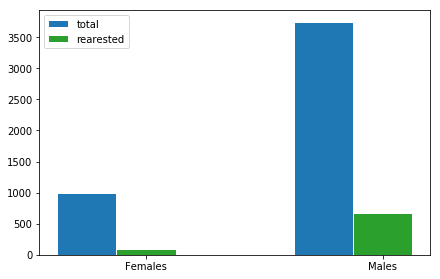

In [5]:
barWidth = .25

bars1 = [np.sum(pr['sex'] == 'Female'), np.sum(pr['sex'] == 'Male')]
bars2 = [np.sum((pr['sex'] == 'Female') & (pr['two_year_recid'] == 1)), 
         np.sum((pr['sex'] == 'Male') & (pr['two_year_recid'] == 1))]
x_labels = ('Females', 'Males')
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.rcParams["figure.figsize"] = (7,4.5)
plt.bar(r1, bars1, color='tab:blue', width=barWidth, edgecolor='white', label='total')
plt.bar(r2, bars2, color='tab:green', width=barWidth, edgecolor='white', label='rearested')
plt.legend()
plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)

plt.show()

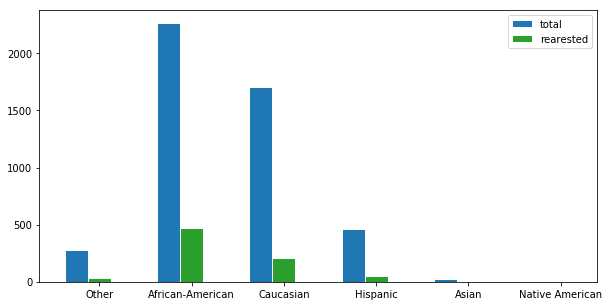

In [6]:
races = pd.unique(pr['race'])

sum_race = []
sum_race_rearested = []
for race in pd.unique(pr['race']):
    sum_race.append(np.sum(pr['race'] == race))
    sum_race_rearested.append(np.sum((pr['race'] == race) & (pr['two_year_recid'] == 1)))
    
    

barWidth = .25

bars1 = [x for x in sum_race]
bars2 = [x for x in sum_race_rearested]
x_labels = (pd.unique(pr['race']))
y_pos1 = np.arange(len(bars1))
y_pos2 = [x + barWidth for x in y_pos1]


plt.rcParams["figure.figsize"] = (10,5)
plt.bar(y_pos1, bars1, color='tab:blue', width=barWidth ,edgecolor='white', label='total')
plt.bar(y_pos2, bars2, color='tab:green', width=barWidth, edgecolor='white', label='rearested')
plt.legend()
plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)

plt.show()

#### Create combined attribute "race-sex"

In [7]:
import itertools

races = pd.unique(pr['race']) 
genders = pd.unique(pr['sex'])
combined = list(itertools.product(races, genders))
combined_list = []
for c in combined:
    print(str(c) + ': ' + str(np.sum((pr['race'] == c[0]) & (pr['sex'] == c[1]))))
    combined_list.append([c, np.sum((pr['race'] == c[0]) & (pr['sex'] == c[1]))])

('Other', 'Male'): 225
('Other', 'Female'): 55
('African-American', 'Male'): 1804
('African-American', 'Female'): 462
('Caucasian', 'Male'): 1301
('Caucasian', 'Female'): 400
('Hispanic', 'Male'): 380
('Hispanic', 'Female'): 78
('Asian', 'Male'): 26
('Asian', 'Female'): 1
('Native American', 'Male'): 10
('Native American', 'Female'): 1


#### Analyze gender distribution in for each race

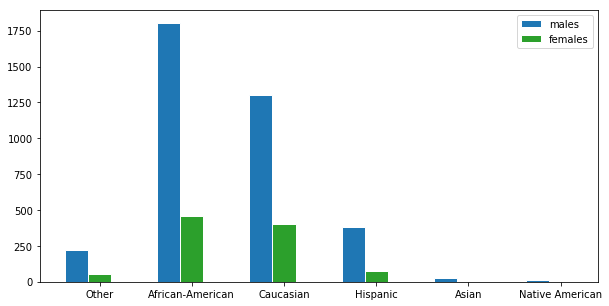

In [9]:
barWidth = 0.25

bars1 = [x[1] for x in combined_list[0::2]]
bars2 = [x[1] for x in combined_list[1::2]]

x_labels = pd.unique(pr['race']) 

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='tab:blue', width=barWidth, edgecolor='white', label='males')
plt.bar(r2, bars2, color='tab:green', width=barWidth, edgecolor='white', label='females')

plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)
plt.legend()
plt.show()


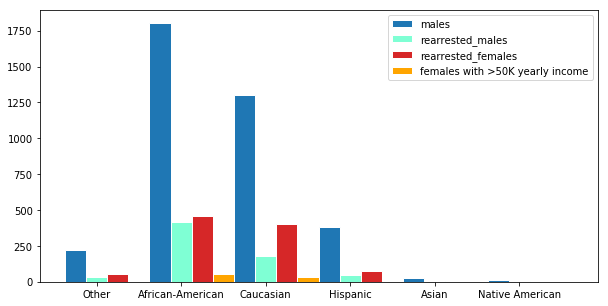

In [11]:
rearrested_males = []
rearrested_females = []
for r in pd.unique(pr['race']) :
        rearrested_males.append(np.sum((pr['race'] == r) 
                                      & (pr['sex'] == 'Male') & (pr['two_year_recid'] == 1)))
        rearrested_females.append(np.sum((pr['race'] == r) 
                                      & (pr['sex'] == 'Female') & (pr['two_year_recid'] == 1)))

bars1 = [x[1] for x in combined_list[0::2]]
bars2 = rearrested_males
bars3 = [x[1] for x in combined_list[1::2]]
bars4 = rearrested_females

x_labels = pd.unique(pr['race']) 

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


plt.bar(r1, bars1, color='tab:blue', width=barWidth, edgecolor='white', label='males')
plt.bar(r2, bars2, color='aquamarine', width=barWidth, edgecolor='white', label='rearrested_males')
plt.bar(r3, bars3, color='tab:red', width=barWidth, edgecolor='white', label='rearrested_females')
plt.bar(r4, bars4, color='orange', width=barWidth, edgecolor='white', label='females with >50K yearly income')


plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)
plt.legend()
plt.show()